# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.77381879, 0.33123615, 0.59692942],
       [0.50710595, 0.9135936 , 0.51325481],
       [0.68375092, 0.91123471, 0.06094211],
       [0.32768093, 0.54217794, 0.90663582],
       [0.75353498, 0.92227082, 0.31540279]])

In [3]:
# размеры массива
a.shape

(5, 3)

In [4]:
# сложение
a + 5

array([[5.77381879, 5.33123615, 5.59692942],
       [5.50710595, 5.9135936 , 5.51325481],
       [5.68375092, 5.91123471, 5.06094211],
       [5.32768093, 5.54217794, 5.90663582],
       [5.75353498, 5.92227082, 5.31540279]])

In [5]:
# матричное умножение
a @ a.T

array([[1.06483763, 1.00140023, 0.86731132, 0.97435218, 1.07686216],
       [1.00140023, 1.35524021, 1.21051118, 1.12683444, 1.38658479],
       [0.86731132, 1.21051118, 1.30157795, 0.77335579, 1.37485673],
       [0.97435218, 1.12683444, 0.77335579, 1.22332022, 1.03290941],
       [1.07686216, 1.38658479, 1.37485673, 1.03290941, 1.51787736]])

In [6]:
# среднее по колонкам
a.mean(axis=-1)

array([0.56732812, 0.64465145, 0.55197591, 0.5921649 , 0.6637362 ])

In [7]:
# решейп
a.reshape(3, 5).shape

(3, 5)

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [23]:
ans = np.sum(np.square(np.arange(1, 10001)))

ans

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [9]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.8103, 0.6283, 0.3391],
        [0.1946, 0.6584, 0.7545],
        [0.1989, 0.4149, 0.7798],
        [0.6136, 0.0856, 0.9876],
        [0.4158, 0.0239, 0.2558]])

In [10]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [11]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [12]:
# сложение
x + 5

tensor([[5.8103, 5.6283, 5.3391],
        [5.1946, 5.6584, 5.7545],
        [5.1989, 5.4149, 5.7798],
        [5.6136, 5.0856, 5.9876],
        [5.4158, 5.0239, 5.2558]])

In [13]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[1.1664, 0.8271, 0.6863, 0.8859, 0.4387],
        [0.8271, 1.0405, 0.9002, 0.9208, 0.2897],
        [0.6863, 0.9002, 0.8198, 0.9277, 0.2921],
        [0.8859, 0.9208, 0.9277, 1.3593, 0.5099],
        [0.4387, 0.2897, 0.2921, 0.5099, 0.2389]])

In [14]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.1664, 0.8271, 0.6863, 0.8859, 0.4387],
        [0.8271, 1.0405, 0.9002, 0.9208, 0.2897],
        [0.6863, 0.9002, 0.8198, 0.9277, 0.2921],
        [0.8859, 0.9208, 0.9277, 1.3593, 0.5099],
        [0.4387, 0.2897, 0.2921, 0.5099, 0.2389]])

In [15]:
# поэлементное умножение
x * x

tensor([[6.5663e-01, 3.9477e-01, 1.1496e-01],
        [3.7852e-02, 4.3349e-01, 5.6920e-01],
        [3.9567e-02, 1.7216e-01, 6.0810e-01],
        [3.7652e-01, 7.3217e-03, 9.7541e-01],
        [1.7290e-01, 5.7078e-04, 6.5457e-02]])

In [16]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.5926, 0.5358, 0.4645, 0.5623, 0.2319])

In [17]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [18]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [19]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [26]:
ans = torch.sum(torch.square(torch.arange(1, 10001)))

ans

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [42]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [43]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.6093, 0.4259, 0.1762],
        [0.6217, 0.0192, 0.5362],
        [0.6640, 0.6243, 0.6939],
        [0.6958, 0.1070, 0.1698],
        [0.8570, 0.6700, 0.8781]])

In [44]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [45]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [46]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [47]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.2679,  0.1991,  0.7477],
        [-0.1320,  0.1332, -1.3178],
        [-0.9502, -0.8770, -1.1982],
        [ 0.1038,  1.0345, -0.1697],
        [ 1.1772, -1.6406, -0.6406]])

In [48]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [49]:
x

tensor([[0.3125, 0.6227, 0.9304],
        [0.4749, 0.9064, 0.5551],
        [0.4383, 0.7462, 0.1761],
        [0.7793, 0.3902, 0.6895],
        [0.0727, 0.9769, 0.8504]])

In [50]:
y

tensor([[0.8741, 0.2518, 0.0288],
        [0.1477, 0.4416, 0.5045],
        [0.0261, 0.7432, 0.3707],
        [0.3237, 0.1725, 0.1011],
        [0.9113, 0.2154, 0.4141]])

In [51]:
# сложение
x + y

tensor([[1.1866, 0.8745, 0.9592],
        [0.6226, 1.3480, 1.0596],
        [0.4644, 1.4895, 0.5468],
        [1.1030, 0.5627, 0.7906],
        [0.9840, 1.1922, 1.2645]])

In [52]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.1866, 0.8745, 0.9592],
        [0.6226, 1.3480, 1.0596],
        [0.4644, 1.4895, 0.5468],
        [1.1030, 0.5627, 0.7906],
        [0.9840, 1.1922, 1.2645]])

In [53]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.1866, 0.8745, 0.9592],
        [0.6226, 1.3480, 1.0596],
        [0.4644, 1.4895, 0.5468],
        [1.1030, 0.5627, 0.7906],
        [0.9840, 1.1922, 1.2645]])

In [77]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [78]:
# убрали одно единичное измерение
x.squeeze(0).size()

torch.Size([5, 3])

In [79]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [80]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [81]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [82]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [83]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [84]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [85]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

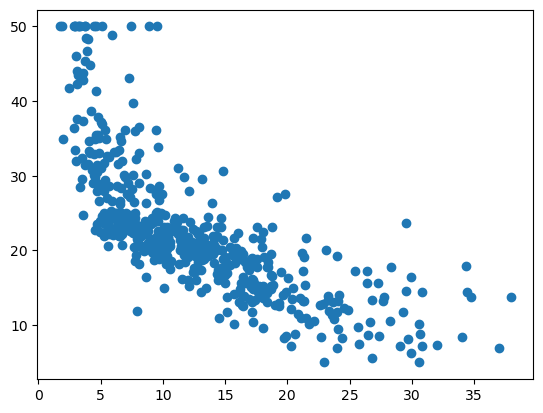

In [86]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

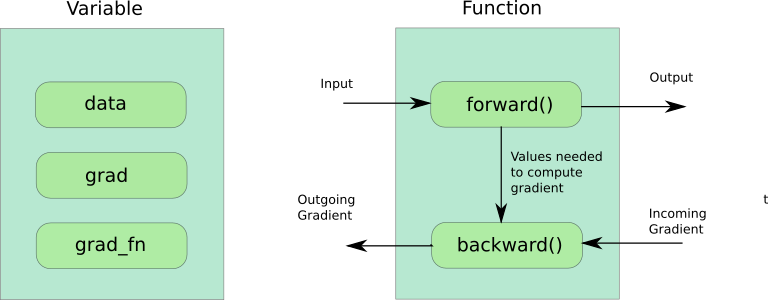

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [130]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [131]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [132]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()



In [133]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.8275])
dL/db = tensor([-43.2645])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [134]:
w.data, w.grad

(tensor([0.6095]), tensor([-11.8275]))

In [135]:
w

tensor([0.6095], requires_grad=True)

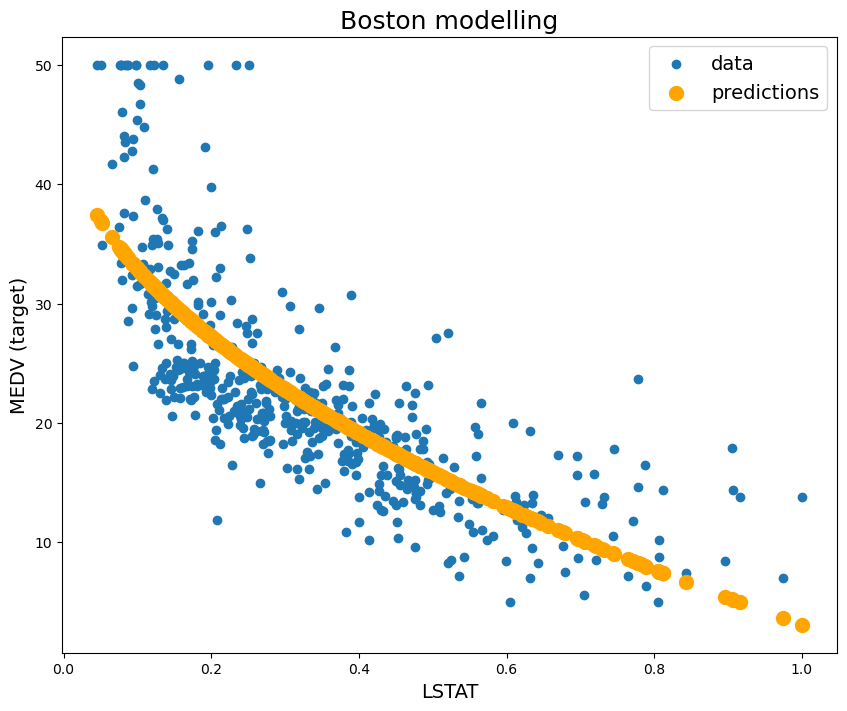

loss =  32.439373


In [141]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x**0.5 + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.0000001:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [142]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [143]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [144]:
our_dataset = RandomDataset(x, y)

In [145]:
our_dataset.__getitem__(1)

{'sample': tensor([0.1182, 0.3147, 0.1107, 0.0947, 0.4490]),
 'target': 0.09545731798197399}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [148]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [149]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.3749, 0.1761, 0.5760, 0.2355, 0.5328],
        [0.1182, 0.3147, 0.1107, 0.0947, 0.4490],
        [0.6547, 0.7509, 0.3843, 0.9395, 0.9193],
        [0.3502, 0.2168, 0.1165, 0.7874, 0.0171]])
Target:
tensor([0.6333, 0.0955, 0.6582, 0.3590], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [150]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [151]:
y_pred = model(batch["sample"])  # получили предсказания модели

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [153]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100%|████████████████████████████| 9912422/9912422 [00:04<00:00, 2440415.19it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 3345458.14it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2705493.77it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 6337501.25it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



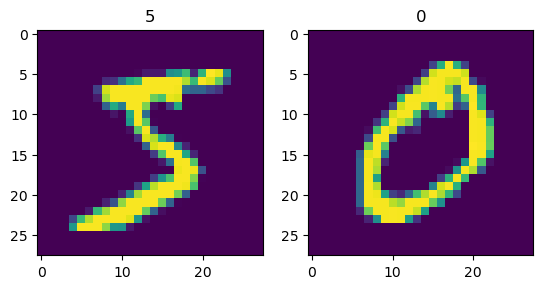

In [154]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [155]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [156]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0239, -0.0288, -0.0163,  ...,  0.0259, -0.0295, -0.0336],
          [-0.0192,  0.0356,  0.0313,  ...,  0.0247,  0.0043,  0.0295],
          [-0.0277,  0.0261,  0.0328,  ..., -0.0163, -0.0009,  0.0028],
          ...,
          [-0.0234, -0.0053, -0.0014,  ...,  0.0206, -0.0089, -0.0273],
          [-0.0087, -0.0352,  0.0249,  ..., -0.0067,  0.0067, -0.0321],
          [ 0.0234,  0.0242, -0.0316,  ...,  0.0227,  0.0344,  0.0253]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-8.3160e-03,  3.2010e-02, -1.3911e-02, -1.2191e-02,  4.6149e-03,
          -2.9938e-02, -3.0904e-02,  1.7122e-02, -2.9790e-02, -2.8010e-02,
           8.5265e-04, -1.6731e-03, -8.1789e-03, -2.5850e-02,  1.2267e-02,
           6.0956e-03, -2.8562e-02,  1.7052e-02,  1.5312e-02,  7.3373e-03,
           2.4528e-02, -2.7212e-02, -7.6034e-03,  2.8909e-02,  2.9160e-02,
           1.4089e-02, -3.1071e-02,  3.1475e-02,  1.9381e-02, -1.5025e-0

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [157]:
!pip install wandb --upgrade --quiet

In [ ]:
import wandb

In [ ]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login
#wandb.login()

In [ ]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [158]:
x = torch.rand(2, 2, device=device)
x

NameError: name 'device' is not defined

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [ ]:
model.to(device)

In [ ]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)